<a href="https://colab.research.google.com/github/rjkryv/ML/blob/main/DL6_GD_%26_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/homeprices_banglore.csv')

In [3]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
df.shape[0]

20

In [5]:
from sklearn import preprocessing 
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis = 'columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
scaled_y = scaled_y.reshape(20,)

price = w1*area + w2*bedrooms + bias 

In [8]:
def batch_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w,X.T) + b

    w_grad = -(2/total_samples)*(np.dot(X.T,(y_true-y_predicted)))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w- learning_rate*w_grad
    b = b-learning_rate*b_grad

    cost = np.mean(np.square(y_true- y_predicted))

# MSE (Mean Squared Error)
    if i % 10 ==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost,cost_list,epoch_list


In [9]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y,500)

In [10]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [11]:
cost_list

[0.2768777174681,
 0.16573507027671064,
 0.10212908135956808,
 0.06564235879682481,
 0.04463022365578522,
 0.03245122421764872,
 0.025317339083010492,
 0.021067914076635823,
 0.01847041893523527,
 0.016821657535428185,
 0.015720331469182485,
 0.014937329116527901,
 0.014341749105819087,
 0.0138587099774241,
 0.013445288028074867,
 0.013076793952344979,
 0.012738945874049962,
 0.012423405193086517,
 0.012125230310262438,
 0.011841424159334757,
 0.011570105565415722,
 0.011310036391930275,
 0.01106035160957391,
 0.010820405104702651,
 0.010589681505198633,
 0.010367745666240432,
 0.010154213642862602,
 0.009948735925187012,
 0.009750987675343718,
 0.009560662965348804,
 0.009377471304274599,
 0.009201135478234784,
 0.009031390146006546,
 0.008867980872255637,
 0.008710663416728342,
 0.008559203175573597,
 0.008413374715338717,
 0.008272961365501463,
 0.008137754849850727,
 0.00800755494527638,
 0.007882169161242129,
 0.0077614124359100785,
 0.007645106846431061,
 0.007533081331802613,
 0

In [12]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
  w = np.ones(shape = X.shape[1])
  b = 0
  total_samples = X.shape[0]
  cost_list2 = []
  epoch_list2 = []
  for i in range(epochs):
    y_predicted = np.dot(w,X.T) + b

    w_grad = -(2/total_samples)*np.dot(X.T,(y_true- y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

    w = w-learning_rate*w_grad
    b = b- learning_rate*b_grad

    cost = np.mean(np.square(y_true-y_predicted))

   

    if i % 10 ==0:
      cost_list2.append(cost)
      epoch_list2.append(i)

    
  return w,b,cost,cost_list2,epoch_list2


In [13]:
w,b,cost,cost_list2,epoch_list2 = batch_gradient_descent(scaled_X,scaled_y,500)

In [14]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [15]:
epoch_list2

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490]

In [16]:
cost_list2

[0.2768777174681,
 0.16573507027671064,
 0.10212908135956808,
 0.06564235879682481,
 0.04463022365578522,
 0.03245122421764872,
 0.025317339083010492,
 0.021067914076635823,
 0.01847041893523527,
 0.016821657535428185,
 0.015720331469182485,
 0.014937329116527901,
 0.014341749105819087,
 0.0138587099774241,
 0.013445288028074867,
 0.013076793952344979,
 0.012738945874049962,
 0.012423405193086517,
 0.012125230310262438,
 0.011841424159334757,
 0.011570105565415722,
 0.011310036391930275,
 0.01106035160957391,
 0.010820405104702651,
 0.010589681505198633,
 0.010367745666240432,
 0.010154213642862602,
 0.009948735925187012,
 0.009750987675343718,
 0.009560662965348804,
 0.009377471304274599,
 0.009201135478234784,
 0.009031390146006546,
 0.008867980872255637,
 0.008710663416728342,
 0.008559203175573597,
 0.008413374715338717,
 0.008272961365501463,
 0.008137754849850727,
 0.00800755494527638,
 0.007882169161242129,
 0.0077614124359100785,
 0.007645106846431061,
 0.007533081331802613,
 0

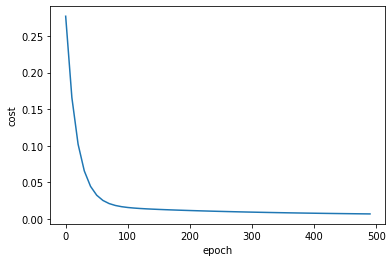

In [17]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list2,cost_list2)
plt.show()

## **Stochastic Gradient Descent**

In [18]:
import random
random.randint(0,5)

3

In [19]:
random.randint(0,7)

4

In [20]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_lst = []
  epoch_lst = []

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w,sample_x.T) + b
     
    w_grad = -(2/total_samples)*np.dot(sample_x.T,(sample_y-y_predicted))
    b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)

    w = w-learning_rate*w_grad
    b = b-learning_rate*b_grad

    cost_sgd = np.mean(np.square(sample_y-y_predicted))

    if i % 100 ==0:
      cost_lst.append(cost_sgd)
      epoch_lst.append(i)

  return w,b,cost,cost_lst,epoch_lst

In [21]:
w_sgd,b_sgd,cost_sgd,cost_lst_sgd,epoch_lst_sgd = stochastic_gradient_descent(scaled_X,scaled_y,10000)


In [22]:
w_sgd,b_sgd,cost_sgd

(array([0.7084734 , 0.67572732]), -0.22749970865177102, 0.0068641890429808105)

In [23]:
len(epoch_lst_sgd)

100

In [24]:
len(cost_lst_sgd)

100

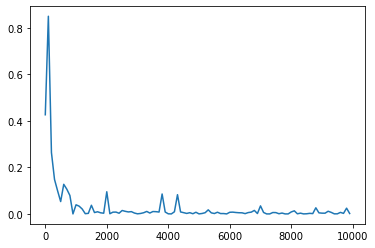

In [25]:
plt.plot(epoch_lst_sgd,cost_lst_sgd)

In [26]:
sx.transform([[12000,5]])

array([[3.86206897, 1.        ]])

In [27]:
def predict(area,bedrooms,w,b):
  sclaed_X = sx.transform([[area,bedrooms]])[0]

# **Mini** **Batch** **Gradient**

In [45]:
def mini_batch_gradient(X,y_true,epochs = 100,batch_size = 5, learning_rate= 0.01):
  number_of_features = X.shape[1]
  total_samples = X.shape[0]

  w = np.ones(shape = number_of_features)
  b = 0

  if batch_size > total_samples:
    batch_size = total_samples

  cost_list3 = []
  epoch_list3 = []

  num_batches = int(total_samples/batch_size)

  for i in range(epochs):
    random_indices = np.random.permutation(total_samples)

    X_tmp = X[random_indices]
    y_tmp = y_true[random_indices]

    for j in range(0,total_samples,batch_size):
      Xj = X_tmp[j:j+batch_size]
      yj = y_tmp[j:j+batch_size]
      y_predicted = np.dot(w,Xj.T) + b

      w_grad = -(2/len(Xj))*(np.dot(Xj.T,(yj-y_predicted)))
      b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

      w = w-learning_rate*w_grad
      b = b-learning_rate*b_grad

      cost = np.mean(np.square(yj-y_predicted))

      if i%10 ==0:
        cost_list3.append(cost)
        epoch_list3.append(i)
  return w,b,cost,cost_list3,epoch_list3

                               

In [46]:
w,b,cost,cost_list3,epoch_list3 = mini_batch_gradient(scaled_X,scaled_y,epochs = 120,batch_size = 5)

In [47]:
w,b,cost

(array([0.7101347 , 0.67815103]), -0.23347163071686877, 0.0045366894042594376)

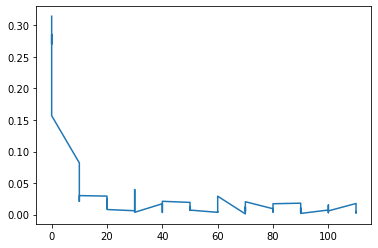

In [48]:
plt.plot(epoch_list3,cost_list3)